<a href="https://colab.research.google.com/github/Nunticha24/Multivariate/blob/main/Chapter_6_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จุดมุ่งหมายของการทำ Cluster Analysis คือ การจัดกลุ่มข้อมูล โดยจาก attributes ของข้อมูล

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
example_df_drop = example_df.iloc[:,:-1]
example_df_drop
# ตัด column สุดท้ายที่เป็น class ของข้อมูลออก

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#**K-means**

ไม่มี input ที่จำเป็นต้องใส่

**import**

In [4]:
from sklearn.cluster import KMeans

**define**

In [5]:
kmeans = KMeans(n_clusters=3, random_state=2021)

**Fit-transfrom**

In [6]:
kmeans.fit(example_df_drop)
#คำนวณหาจุด cluster center ของข้อมูล ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [7]:
kmeans.cluster_centers_
#แสดงจุด cluster centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

**ทดสอบการจัดกลุ่มของ Data**

In [8]:
y = kmeans.predict(example_df_drop)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

###**Quiz 6**

ทำ PCA ข้อมูล example_df_drop แล้ววาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับกราฟ PCA-scatter ของข้อมูลจริง

**import**

In [9]:
from sklearn.decomposition import PCA

**define**

In [10]:
pca = PCA(n_components=2)

**fit-tramsfrom** 
ไม่ต้องเรียงใหม่ เพราะเรียงไว้แล้ว

In [11]:
new_pca = pca.fit_transform(example_df_drop)

In [12]:
from matplotlib import pyplot as plt

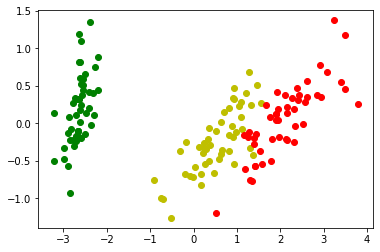

In [13]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'og')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'oy')
plt.plot(new_pca[100:,0],new_pca[100:,1],'or')

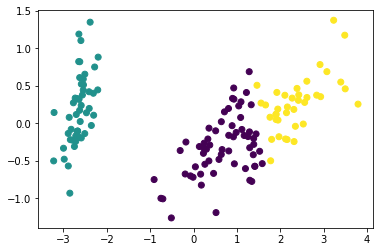

In [14]:
#plot ที่ไม่รู้กราฟจริงมาก่อน
kmeans= KMeans(n_clusters=3,random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [15]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)
new_cluster_center

array([[ 0.67443933, -0.31390945],
       [-2.64084076,  0.19051995],
       [ 2.37438946,  0.2614839 ]])

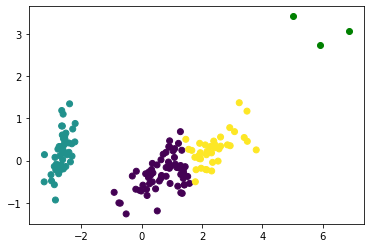

In [17]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'og')

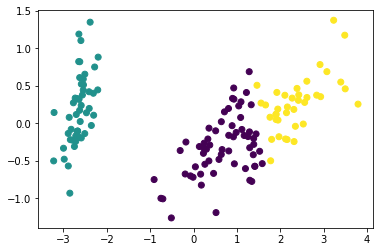

In [20]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) #plot กราฟจริง

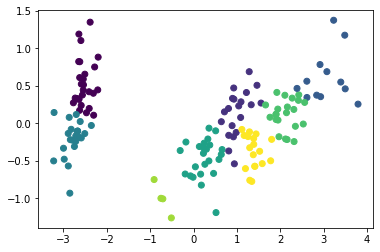

In [21]:
kmeans = KMeans(random_state=2021)
kmeans.fit(example_df_drop)
y = kmeans.predict(example_df_drop)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
#ใช้ค่า Default

In [22]:
kmeans.cluster_centers_


array([[5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444]])

ค่า K ควรจะเป็นเท่าไหร่

https://realpython.com/k-means-clustering-python/#choosing-the-appropriate-number-of-clusters


#**ElbowMethod**

In [23]:
kmeans.inertia_  #SSE(Sum of Squared Errors)

29.955568877177576

In [24]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(example_df_drop)
    SSE.append(kmeans.inertia_)

In [25]:
SSE

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.18920546865627,
 29.955568877177576]

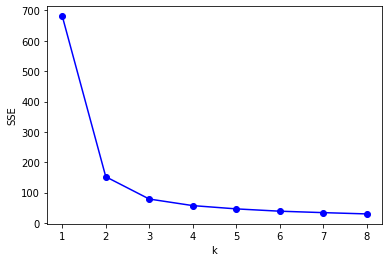

In [26]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

#**Silhouette coefficient**
1.  How close the data point is to other points in the cluster
2.   How far away the data point is from points in other clusters



In [27]:
from sklearn import metrics

In [28]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k , random_state=2021)
    kmeans.fit(example_df_drop)
    score = metrics.silhouette_score(example_df_drop,kmeans.labels_)
    SilH.append(score)

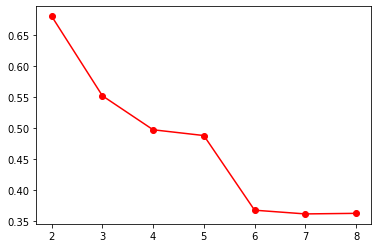

In [30]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')